# Loading Dataset and importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder



# Load the data into a Pandas DataFrame
data = pd.read_csv("telco_churn.csv")

# Showing Dataset head values

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [3]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,No


In [4]:
data.shape

(7043, 20)

# Dropping non relevant variables, duplicates, replacing empty values with mean value and converting categorical variables to numerical values.

# Missing values

In [6]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100

missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent %"])
print(missing_data.head(20))

                  Total  Percent %
customerID            0        0.0
gender                0        0.0
MonthlyCharges        0        0.0
PaymentMethod         0        0.0
PaperlessBilling      0        0.0
Contract              0        0.0
StreamingMovies       0        0.0
StreamingTV           0        0.0
TechSupport           0        0.0
DeviceProtection      0        0.0
OnlineBackup          0        0.0
OnlineSecurity        0        0.0
InternetService       0        0.0
MultipleLines         0        0.0
PhoneService          0        0.0
tenure                0        0.0
Dependents            0        0.0
Partner               0        0.0
SeniorCitizen         0        0.0
Churn                 0        0.0


In [7]:
#data.drop(["customerID"], axis=1, inplace=False)
data_noid = data.drop(["customerID", "Partner", "Dependents", "PaperlessBilling"], axis=1)

In [8]:
data_noid.shape

(7043, 16)

# Inquiring about null values in the different variables and dropping duplicates

In [9]:
data_noid.isnull().sum()

gender              0
SeniorCitizen       0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [10]:
data_noid = data_noid.drop_duplicates()

In [11]:
data_noid.shape

(6963, 16)

No need to fill empty values with mean value as there are no empty entries

In [12]:
#data_noid["tenure"].fillna(data_noid["tenure"].mean(), inplace=True)
#data_noid["MonthlyCharges"].fillna(data_noid["MonthlyCharges"].mean(), inplace=True)

In [13]:
categorical_cols = ["gender", "PaymentMethod", "PhoneService", "MultipleLines", "InternetService", 
                    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
                    "StreamingMovies", "Contract", "Churn"]
for col in categorical_cols:
    dummies = pd.get_dummies(data_noid[col], prefix=col)
    data_noid = pd.concat([data_noid, dummies], axis=1)
    data_noid.drop(col, axis=1, inplace=True)

#data_noid.drop(["customerID"], axis=1)

In [14]:
data_noid.shape

(6963, 40)

No missing values in any column, so no need to fill empty cells

In [15]:
data_noid.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
gender_Female                              0
gender_Male                                0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBack

In [16]:
data_noid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6963 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            6963 non-null   int64  
 1   tenure                                   6963 non-null   int64  
 2   MonthlyCharges                           6963 non-null   float64
 3   gender_Female                            6963 non-null   uint8  
 4   gender_Male                              6963 non-null   uint8  
 5   PaymentMethod_Bank transfer (automatic)  6963 non-null   uint8  
 6   PaymentMethod_Credit card (automatic)    6963 non-null   uint8  
 7   PaymentMethod_Electronic check           6963 non-null   uint8  
 8   PaymentMethod_Mailed check               6963 non-null   uint8  
 9   PhoneService_No                          6963 non-null   uint8  
 10  PhoneService_Yes                         6963 no

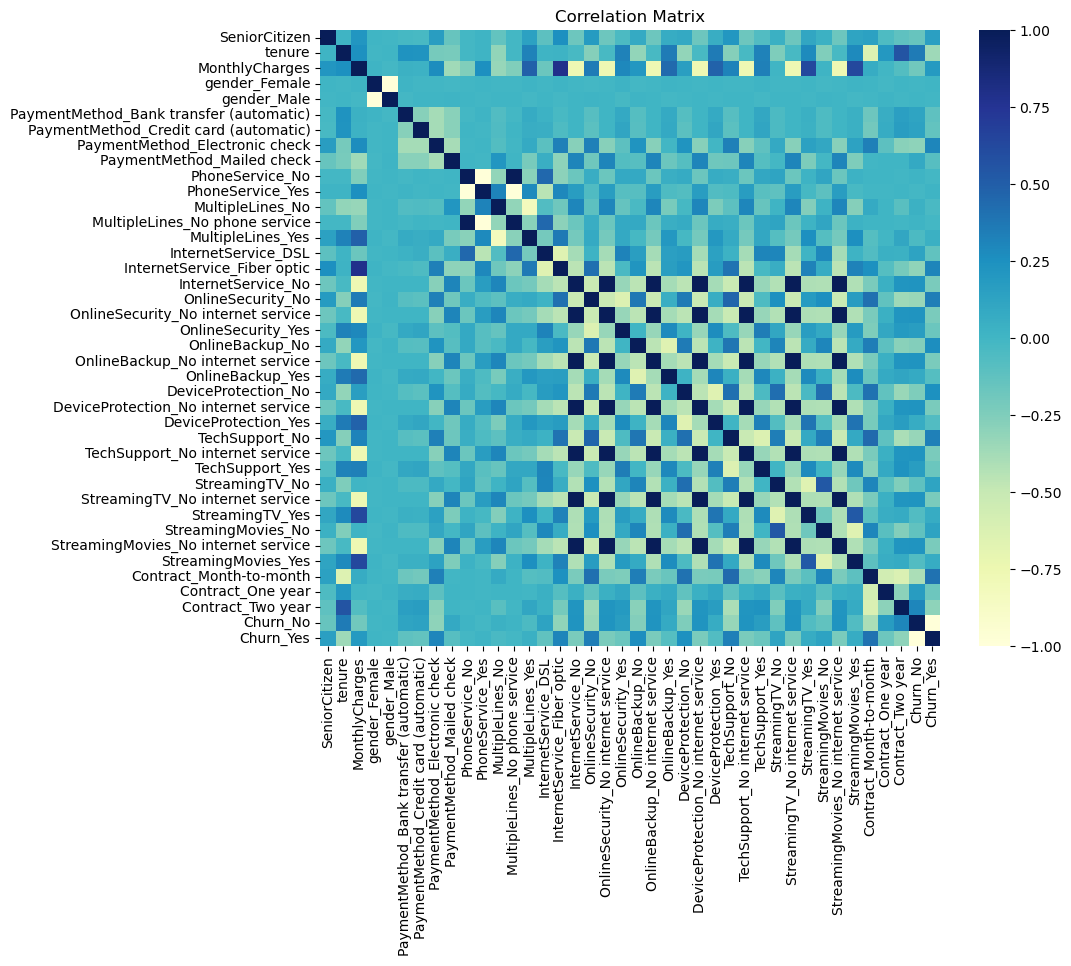

In [17]:
# Correlation matrix
corr_matrix = data_noid.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

In [18]:
corr_Churn_Y = data_noid.corrwith(data_noid['Churn_Yes'])
corr_Churn_Y = corr_Churn_Y.to_frame()
corr_Churn_Y

,0
SeniorCitizen,0.151127
tenure,-0.351903
MonthlyCharges,0.194407
gender_Female,0.007304
gender_Male,-0.007304
PaymentMethod_Bank transfer (automatic),-0.117199
PaymentMethod_Credit card (automatic),-0.133012
PaymentMethod_Electronic check,0.301393
PaymentMethod_Mailed check,-0.093686
PhoneService_No,-0.011411


In [19]:
corr_Churn_Y[corr_Churn_Y[0]>= 0.25]

,0
PaymentMethod_Electronic check,0.301393
InternetService_Fiber optic,0.308359
OnlineSecurity_No,0.341003
OnlineBackup_No,0.265501
TechSupport_No,0.335552
Contract_Month-to-month,0.405288
Churn_Yes,1.000000


In [20]:
corr_Churn_Y[corr_Churn_Y[0]<= -0.25]

,0
tenure,-0.351903
Contract_Two year,-0.301539
Churn_No,-1.000000


We need to check if these colums have correlation between themselves. If so, we could supress some of them for out regression model

The column Churn_Yes has a relatively high correlation with "Contract Month-to-Month", "TechSupport_No", "DeviceProtection_No", "OnlineBackup_No", "OnlineSecurity_No" and "InternetService_Fiber optic"

# Generate descriptive statistics for the dataset

In [23]:
data_noid.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes
0,0,1,29.85,1,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
1,0,34,56.95,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0,2,53.85,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,45,42.30,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
4,0,2,70.70,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [24]:
print(data_noid.describe())

       SeniorCitizen       tenure  MonthlyCharges  gender_Female  gender_Male  \
count    6963.000000  6963.000000     6963.000000    6963.000000  6963.000000   
mean        0.163579    32.587103       65.136170       0.496625     0.503375   
std         0.369920    24.477540       29.968185       0.500025     0.500025   
min         0.000000     0.000000       18.250000       0.000000     0.000000   
25%         0.000000     9.000000       38.550000       0.000000     0.000000   
50%         0.000000    29.000000       70.550000       0.000000     1.000000   
75%         0.000000    56.000000       90.000000       1.000000     1.000000   
max         1.000000    72.000000      118.750000       1.000000     1.000000   

       PaymentMethod_Bank transfer (automatic)  \
count                              6963.000000   
mean                                  0.221169   
std                                   0.415064   
min                                   0.000000   
25%                 

# Visualize the distributions of various variables using histograms and boxplots

#### Not much sense on showing the Senior Citizen and Churn variables histograms and boxplots as these are binary variables (0-1)

([<matplotlib.patches.Wedge at 0x165901bb0>,
 [Text(0.9579182961516561, 0.5407333334444144, 'Senior'),
  Text(-0.9579183214652094, -0.5407332886010219, 'Non Senior')],
 [Text(0.5225008888099942, 0.2949454546060442, '16.4%'),
  Text(-0.5225009026173869, -0.2949454301460119, '83.6%')])

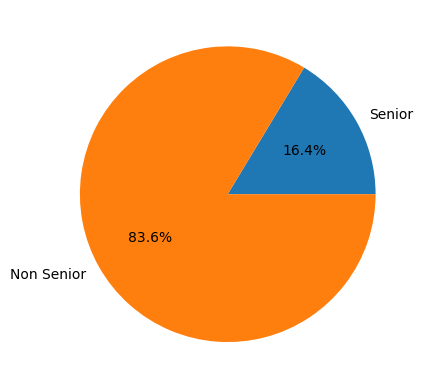

In [25]:
nonSen = data_noid['SeniorCitizen'].value_counts()[0]
Sen = data_noid['SeniorCitizen'].value_counts()[1]

Senior_Cat = ["Senior", "Non Senior"] 
SeniorCitizen = [Sen, nonSen] 

fig, ax = plt.subplots()
ax.pie(SeniorCitizen, labels=Senior_Cat, autopct='%1.1f%%')

[1842, 5121]


([<matplotlib.patches.Wedge at 0x165f3daf0>,
 [Text(0.7414858096191926, 0.8125261805833524, 'Churn'),
  Text(-0.7414858096191926, -0.8125261805833524, 'No Churn')],
 [Text(0.40444680524683235, 0.44319609850001035, '26.5%'),
  Text(-0.40444680524683235, -0.44319609850001035, '73.5%')])

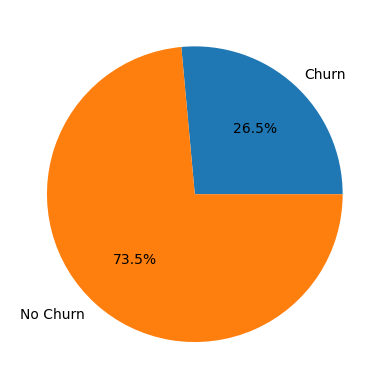

In [34]:
no_Churn = data_noid['Churn_No'].value_counts()[0]
yes_Churn = data_noid['Churn_No'].value_counts()[1]

Churn_Cat = ["Churn", "No Churn"] 
Churn_pie = [no_Churn, yes_Churn]
print(Churn_pie)

fig, ax = plt.subplots()
ax.pie(Churn_pie, labels=Churn_Cat, autopct='%1.1f%%')

<BarContainer object of 2 artists>

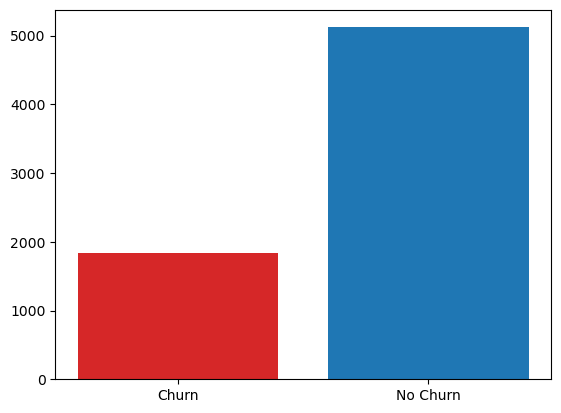

In [36]:
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

fig, ax = plt.subplots()
ax.bar(Churn_Cat, Churn_pie, label=bar_labels, color=bar_colors)

([<matplotlib.patches.Wedge at 0x16605d160>,
 [Text(-0.011662922776419029, 1.0999381692769423, 'Male'),
  Text(0.011662922776419136, -1.0999381692769423, 'Female')],
 [Text(-0.006361594241683106, 0.5999662741510594, '50.3%'),
  Text(0.006361594241683165, -0.5999662741510594, '49.7%')])

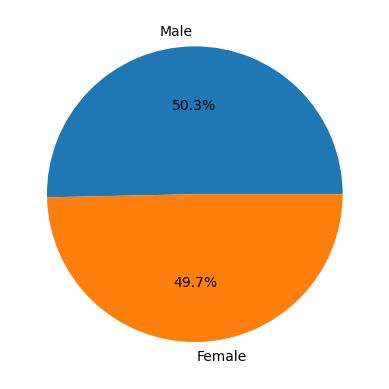

In [37]:
gen_Female = data_noid['gender_Female'].value_counts()[0]
gen_Male = data_noid['gender_Female'].value_counts()[1]

Gender_Cat = ["Male", "Female"] 
gender_pie = [gen_Female, gen_Male]

fig, ax = plt.subplots()
ax.pie(gender_pie, labels=Gender_Cat, autopct='%1.1f%%')

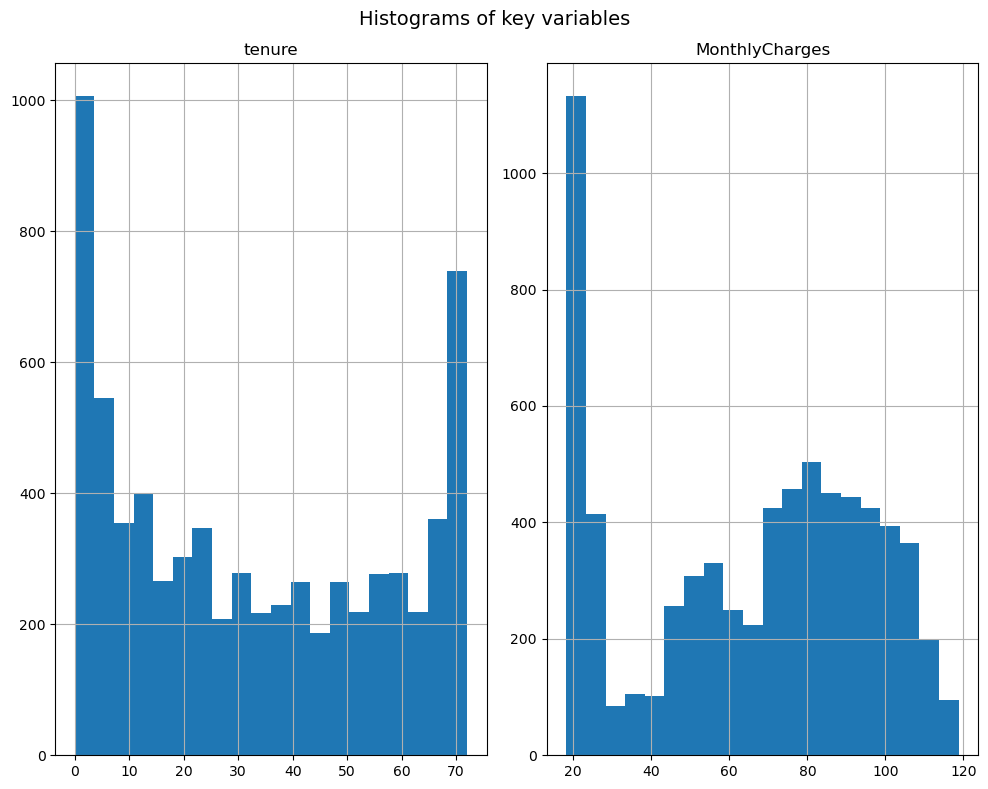

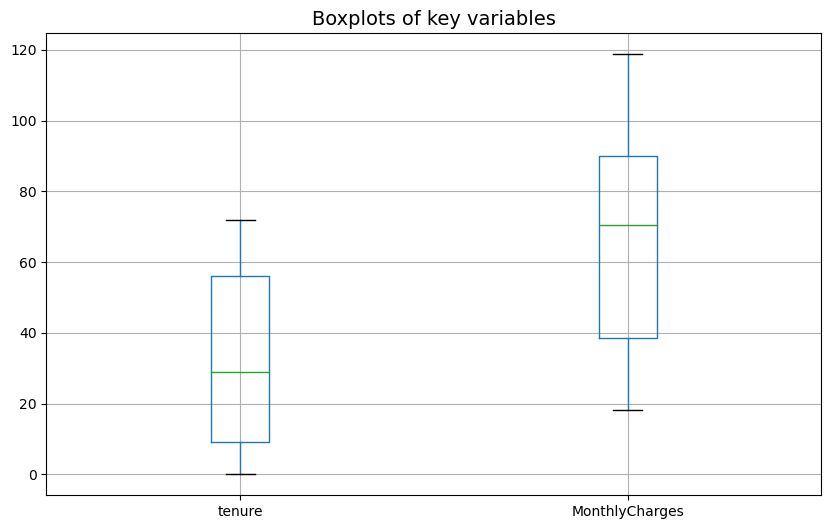

In [38]:
# Plot histograms
data_noid.hist(column=["tenure", "MonthlyCharges"], bins=20, figsize=(10, 8))
plt.suptitle("Histograms of key variables", fontsize=14)
plt.tight_layout()
plt.show()

# Plot boxplots
data_noid.boxplot(column=["tenure", "MonthlyCharges"], figsize=(10, 6))
plt.title("Boxplots of key variables", fontsize=14)
plt.show()

In [39]:
data_noid.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes
0,0,1,29.85,1,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
1,0,34,56.95,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0,2,53.85,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,45,42.30,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
4,0,2,70.70,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


# Scaling data

In [40]:
X = data_noid[['tenure', 'MonthlyCharges']]

scaler = StandardScaler()

scaledX = scaler.fit_transform(X)


scaledX_df = pd.DataFrame(scaledX)

scaledX_df.columns = ["tenure", "MonthlyCharges"]

print(scaledX_df)

        tenure  MonthlyCharges
0    -1.290545       -1.177539
1     0.057726       -0.273182
2    -1.249689       -0.376632
3     0.507150       -0.762069
4    -1.249689        0.185671
...        ...             ...
6958 -0.350841        0.656204
6959  1.610281        1.270233
6960 -0.881978       -1.185882
6961 -1.167975        0.309144
6962  1.365141        1.351992

[6963 rows x 2 columns]


In [41]:
scaledX_df

,tenure,MonthlyCharges
0,-1.290545,-1.177539
1,0.057726,-0.273182
2,-1.249689,-0.376632
3,0.507150,-0.762069
4,-1.249689,0.185671
...,...,...
6958,-0.350841,0.656204
6959,1.610281,1.270233
6960,-0.881978,-1.185882
6961,-1.167975,0.309144


In [42]:
data_noid.drop(["tenure", "MonthlyCharges"], axis=1, inplace=True)

In [43]:
data_noid.head()

,SeniorCitizen,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes
0,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,1,0,0,0,1,0,1,1,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,1
3,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4,0,1,0,0,0,1,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1


In [44]:
data_noid.reset_index(drop=True)

,SeniorCitizen,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes
0,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,1,0,0,0,1,0,1,1,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,1
3,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4,0,1,0,0,0,1,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
6959,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
6960,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
6961,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [45]:
data_noid.shape

(6963, 38)

In [46]:
scaledX_df.shape

(6963, 2)

In [47]:
scaledX_df.reset_index(drop=True)

,tenure,MonthlyCharges
0,-1.290545,-1.177539
1,0.057726,-0.273182
2,-1.249689,-0.376632
3,0.507150,-0.762069
4,-1.249689,0.185671
...,...,...
6958,-0.350841,0.656204
6959,1.610281,1.270233
6960,-0.881978,-1.185882
6961,-1.167975,0.309144


In [48]:
new_data = pd.concat([data_noid.reset_index(drop=True), scaledX_df.reset_index(drop=True)], axis=1)

In [49]:
new_data

,SeniorCitizen,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes,tenure,MonthlyCharges
0,0,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,-1.290545,-1.177539
1,0,0,1,0,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0.057726,-0.273182
2,0,0,1,0,0,0,1,0,1,1,...,1,0,0,1,0,0,0,1,-1.249689,-0.376632
3,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0.507150,-0.762069
4,0,1,0,0,0,1,0,0,1,1,...,1,0,0,1,0,0,0,1,-1.249689,0.185671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,-0.350841,0.656204
6959,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,1,0,1.610281,1.270233
6960,0,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,-0.881978,-1.185882
6961,1,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,-1.167975,0.309144


In [50]:
new_data.shape

(6963, 40)

We drop the non-scaled variables to avoid duplicate, redundant data

In [51]:
new_data.head()

,SeniorCitizen,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes,tenure,MonthlyCharges
0,0,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,-1.290545,-1.177539
1,0,0,1,0,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0.057726,-0.273182
2,0,0,1,0,0,0,1,0,1,1,...,1,0,0,1,0,0,0,1,-1.249689,-0.376632
3,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0.507150,-0.762069
4,0,1,0,0,0,1,0,0,1,1,...,1,0,0,1,0,0,0,1,-1.249689,0.185671


In [52]:
new_data.tail()

,SeniorCitizen,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes,tenure,MonthlyCharges
6958,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,-0.350841,0.656204
6959,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,1,0,1.610281,1.270233
6960,0,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,-0.881978,-1.185882
6961,1,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,-1.167975,0.309144
6962,0,0,1,1,0,0,0,0,1,1,...,0,0,1,0,0,1,1,0,1.365141,1.351992


In [53]:
new_data.isnull().sum()

SeniorCitizen                              0
gender_Female                              0
gender_Male                                0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProt

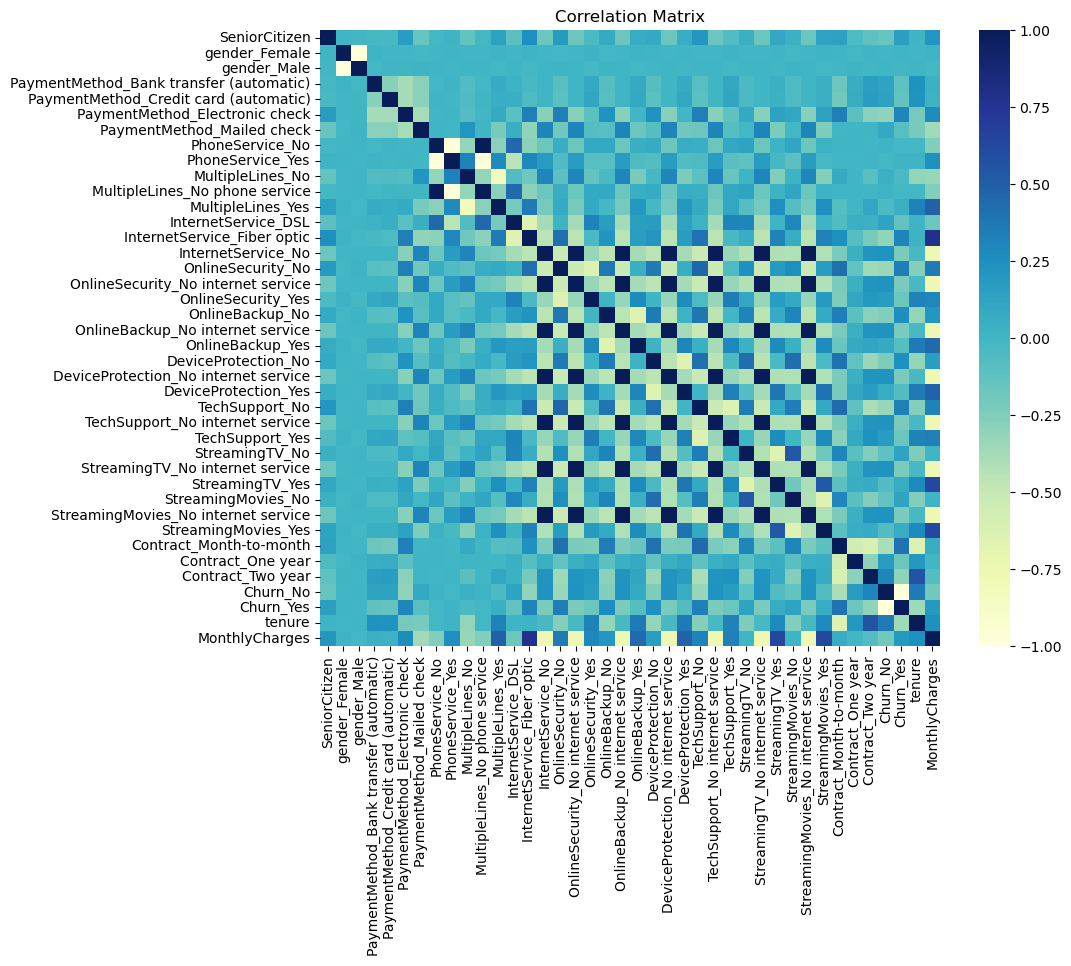

In [54]:
# Correlation matrix
corr_matrix = new_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

# Encoding Categorical Variables

## Not sure if this had to be done before turning categorical variables intpo numerical

In [55]:
new_data.head()

,SeniorCitizen,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes,tenure,MonthlyCharges
0,0,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,-1.290545,-1.177539
1,0,0,1,0,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0.057726,-0.273182
2,0,0,1,0,0,0,1,0,1,1,...,1,0,0,1,0,0,0,1,-1.249689,-0.376632
3,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0.507150,-0.762069
4,0,1,0,0,0,1,0,0,1,1,...,1,0,0,1,0,0,0,1,-1.249689,0.185671


In [56]:
data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [57]:
data.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [58]:
data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [59]:
data.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [60]:
data.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [61]:
data.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [62]:
data.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [63]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [64]:
data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [65]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['PaymentMethod','StreamingTV', 'Contract', 'TechSupport',
                                                      'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 
                                                       'InternetService', 'MultipleLines'])
print(one_hot_encoded_data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService StreamingMovies PaperlessBilling  MonthlyCharges  ...  \
0              No              No              Yes           29.85  ...   
1        

In [66]:
print(one_hot_encoded_data.describe())

       SeniorCitizen       tenure  MonthlyCharges  \
count    7043.000000  7043.000000     7043.000000   
mean        0.162147    32.371149       64.761692   
std         0.368612    24.559481       30.090047   
min         0.000000     0.000000       18.250000   
25%         0.000000     9.000000       35.500000   
50%         0.000000    29.000000       70.350000   
75%         0.000000    55.000000       89.850000   
max         1.000000    72.000000      118.750000   

       PaymentMethod_Bank transfer (automatic)  \
count                              7043.000000   
mean                                  0.219225   
std                                   0.413751   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic 

In [67]:
colnames = list(one_hot_encoded_data.columns)
print(colnames)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'Churn', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes']


/var/folders/n9/qzvb5pqn1cx_wzl62wxm5j2r0000gn/T/ipykernel_925/3194110845.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = one_hot_encoded_data.corr()


Text(0.5, 1.0, 'Correlation between coded and numerical features')

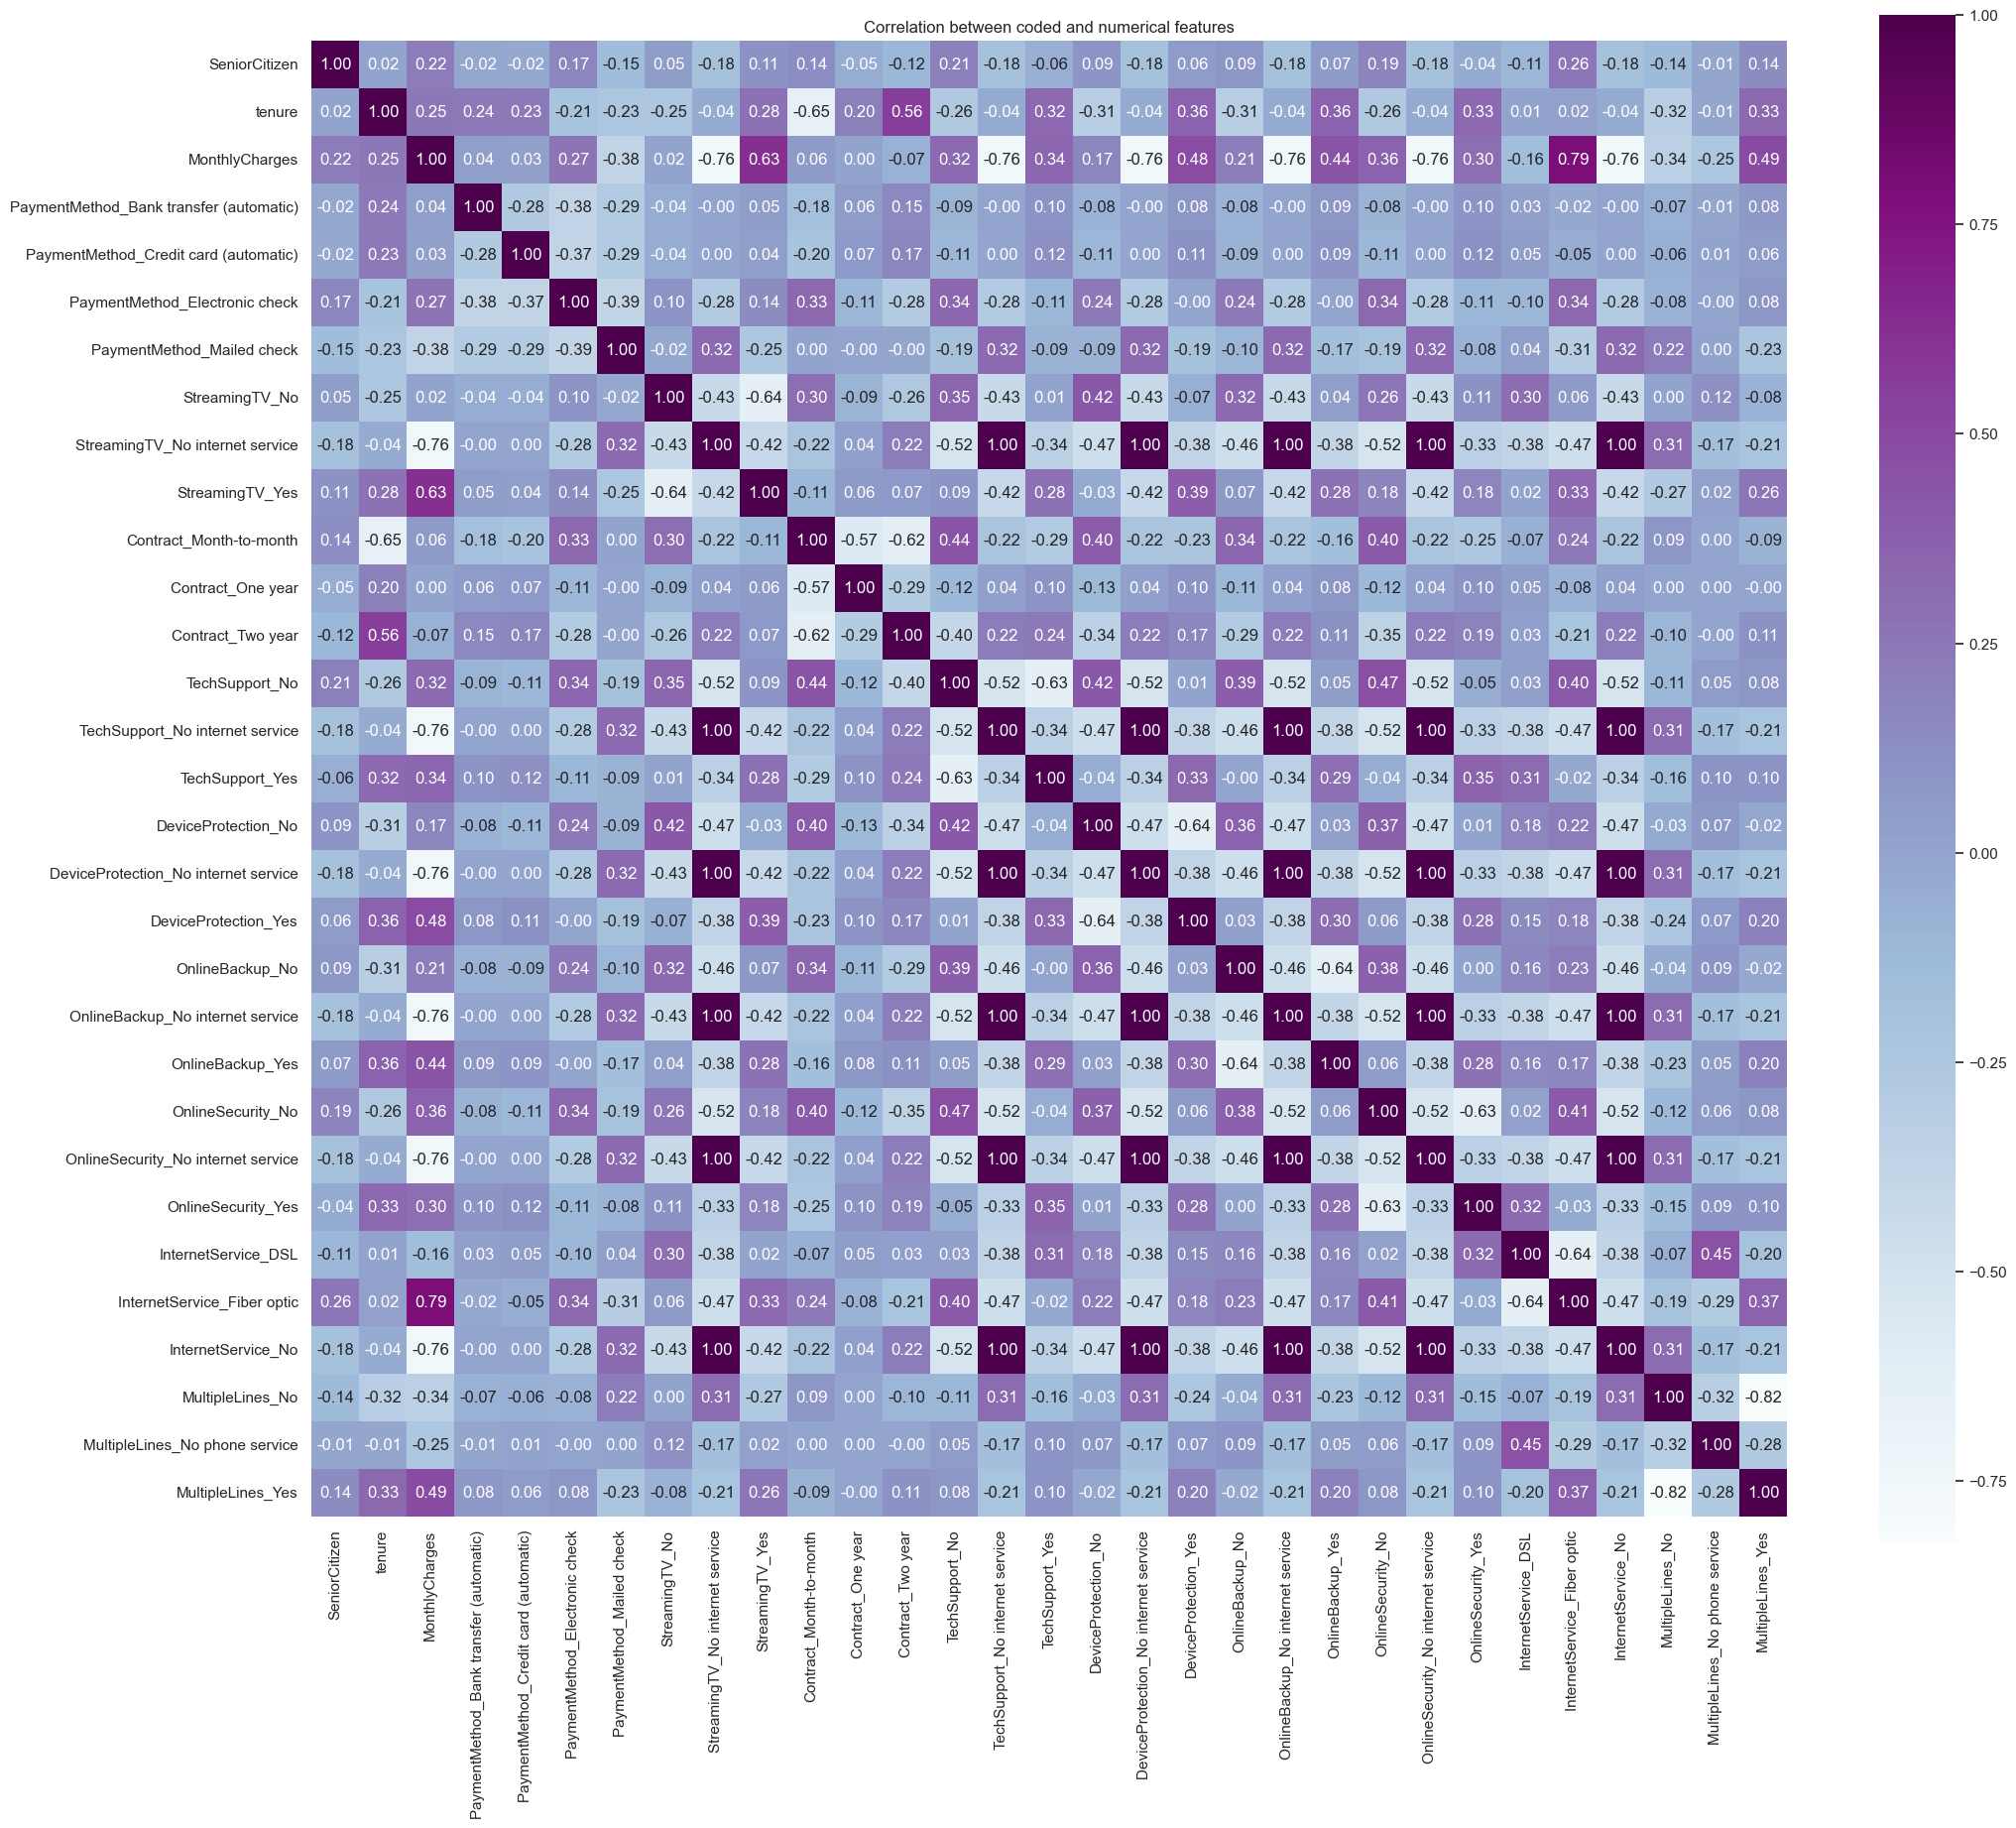

In [68]:
#one_hot_encoded_data.drop(['customerID'])


# Calculate the correlation matrix
corr = one_hot_encoded_data.corr()

# Visualize the correlation matrix
sns.set(font_scale=1)
plt.figure(figsize=(24, 20))

sns.heatmap(corr, fmt='.2f', 
            linewidths=0.002,
            square=True, annot=True, cmap="BuPu", linecolor="red")
plt.title('Correlation between coded and numerical features')

# Principal Component Analysis (PCA)

In [69]:
# instantiate PCA object with two components
pca = PCA(n_components=2)

# fit and transform data
pca_data = pca.fit_transform(new_data)

# convert back to pandas DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# print transformed data
pca_df.head()

,PC1,PC2
0,0.375500,-1.880917
1,0.155565,-0.160069
2,0.166587,-1.754051
3,0.211576,0.567599
4,-0.586155,-2.378628
